# Practical Exercise: Data Preparation and Visualisation

## Exercise I. Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import h5py
import os, glob
import re
from datetime import datetime, date, time
from six import iteritems
%load_ext autoreload
%autoreload 2

###  1. Data Reading and Exploration

### Initialize Class and Read files
In blond.py file, you can find the Blond class which handles data input, output and calibration. When the Blond class is initiated, it tries to acquire the data, whose interval is specified as an input. 

**Note that:** 
* It only create h5py objects which is not actually reading the data. 

* From this point on, using this Blond object one can not read any other time which is not in the interval of the data itself. 

In [2]:
from blond import Blond,get_time_diff
blond = Blond(date(2016,10,5))


In [3]:
"""Checking if files have been retrieved"""
blond.list_files()

{'clear': [<HDF5 file "clear-2016-10-05T00-01-50.891503T+0200-0001306.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-06-51.177842T+0200-0001307.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-11-51.464126T+0200-0001308.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-16-51.750433T+0200-0001309.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-21-52.035992T+0200-0001310.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-26-52.322393T+0200-0001311.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-31-52.608751T+0200-0001312.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-36-52.894519T+0200-0001313.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-41-53.180820T+0200-0001314.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-46-53.467073T+0200-0001315.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-51-53.752681T+0200-0001316.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T00-56-54.039123T+0200-0001317.hdf5" (mode r+)>,
  <HDF5 file "clear-2016-10-05T01-01-54.325

### Example Data Read

In order to read a data interval, one needs to specify **device**("clear", "medal-1"...), **signal**("current1", "current2"...), start and end times. The time parameters here should be present in the specified device data.  

In [4]:
blond.read_data( device="medal-1",signal="current1",start_ts=time(0,50,0), end_ts=time(2,17,13))

array([ -9, -18, -11, ..., -15, -12, -15])

### Exploration


In [5]:
"""signals acquisited by MEDAL"""
medal_file = blond.list_files()['medal-1'][0]
[key for key in medal_file.keys()]

['current1',
 'current2',
 'current3',
 'current4',
 'current5',
 'current6',
 'voltage']

In [6]:
"""signals acquisited by CLEAR"""
clear_file = blond.list_files()['clear'][0]
[key for key in clear_file.keys()]

['current1', 'current2', 'current3', 'voltage1', 'voltage2', 'voltage3']

### Centering and calibrating

In [ ]:
blond.center_and_calibrate_all()

## Exercise III. Feature Extraction

In order to run the Dash-Plotly application, you need to run **python app.py**. After the server runs, you can connect to the server and use the application.

## Exercise IV. Visualization

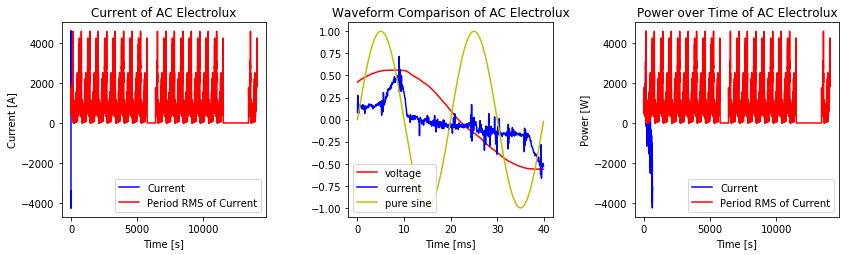

In [41]:
import numpy as np
import matplotlib.pyplot as plt

sps = 6400
phase = 1
requested_time = time(1,10,10)
file_index = blond.find_corresponding_file(requested_time, blond.time_stamps['clear'])
time_diff = get_time_diff(requested_time , blond.time_stamps['clear'][file_index])
data_index_shift = time_diff * sps
temp_data1 = blond.list_files()['clear'][file_index]["current"+str(phase)][data_index_shift:data_index_shift + int(sps*0.1)]
temp_data2 = blond.list_files()['clear'][file_index]["voltage"+str(phase)][data_index_shift:data_index_shift + int(sps*0.1)]

#calculate period Root-Mean-Square of the Current
for curr in temp_data1:
    curr_rms.append(np.sqrt(np.mean(curr**2)))
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

plot1 = ax[0]
t = np.arange(0.0, 0.6, 0.6/640)
plot1.plot(t, temp_data1, color='b', label='Current')
plot1.plot(curr_rms, color='r', label='Period RMS of Current')
plot1.set_title('Current of AC Electrolux')
plot1.set_xlabel('Time [s]')
plot1.set_ylabel('Current [A]')
plot1.legend()

plot2 = ax[1]
t = np.arange(0.0, 40.0, 40/640)
sinewave = np.sin(2*np.pi*t/20)
plot2.plot(t, temp_data2/50000, color='r', label='voltage')
plot2.plot(t, temp_data1/6400, color='b', label='current')
plot2.plot(t, sinewave, color='y', label='pure sine')
plot2.set_title('Waveform Comparison of AC Electrolux')
plot2.set_xlabel('Time [ms]')
plot2.legend()

plot3 = ax[2]
plot3.plot(temp_data1, color='b', label='Current')
plot3.plot(curr_rms, color='r', label='Period RMS of Current')
plot3.set_title('Power over Time of AC Electrolux')
plot3.set_xlabel('Time [s]')
plot3.set_ylabel('Power [W]')
plot3.legend()

plt.subplots_adjust(left=0, wspace=0.4, top=0.8)

plt.show()